<a href="https://colab.research.google.com/github/Benjamin25-11/Tareas/blob/main/Tarea_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Numerico (RK4): [1.         1.19090881 1.36666627 1.53076879 1.68571385 1.83333291
 1.9749996  2.11176433 2.2444441  2.37368389 2.4999997 ]
Numerico (Taylor): [1.         1.1909     1.36665385 1.53075522 1.68570028 1.83331989
 1.97498737 2.11175295 2.24443357 2.37367417 2.49999074]
Solución Analítica : [1.         1.19090909 1.36666667 1.53076923 1.68571429 1.83333333
 1.975      2.11176471 2.24444444 2.37368421 2.5       ]


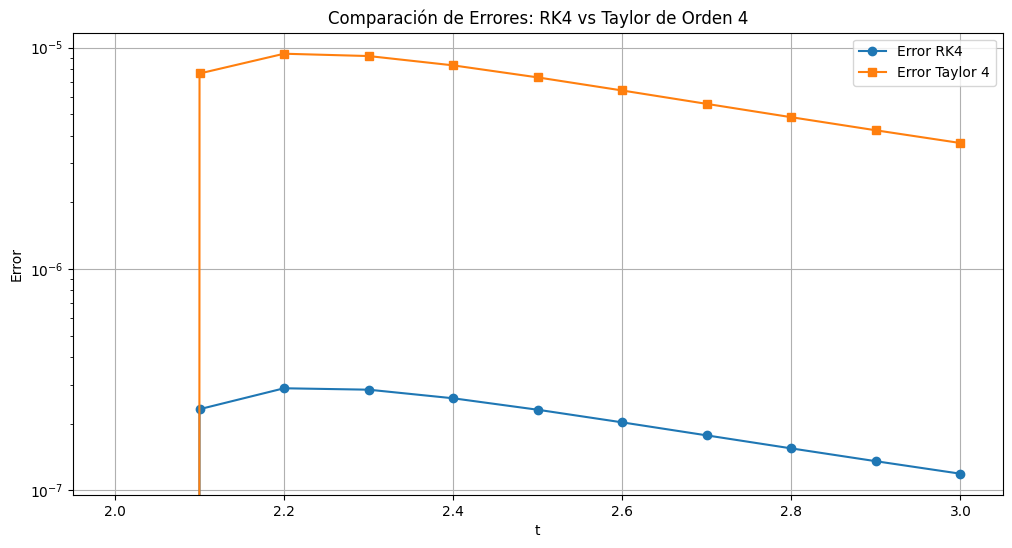

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Función derivada dada en el problema
def f(t, y):
    return 1 + (t - y)**2

# Derivadas necesarias para el método de Taylor
def df(t, y):
    return (-2)*(t-y)**3

def d2f(t, y):
    return 6*(t-y)**4
def d3f(t, y):
    return (-24)*(t-y)**5

# Solución exacta
def sol_analitica(t):
    return t + 1 / (1 - t)

# Método de Runge-Kutta de orden 4
def rk4(f, a, b, yo, N):
    h = (b - a) / N
    t = a
    w = yo
    ts = np.zeros(N + 1)
    sol = np.zeros(N + 1)

    for i in range(N):
        ts[i] = t
        sol[i] = w
        k1 = h * f(t, w)
        k2 = h * f(t + h / 2, w + k1 / 2)
        k3 = h * f(t + h / 2, w + k2 / 2)
        k4 = h * f(t + h, w + k3)
        w = w + (k1 + 2 * k2 + 2 * k3 + k4) / 6
        t = t + h

    ts[N] = t
    sol[N] = w

    return ts, sol

# Método de Taylor de orden 4
def taylor4(f, df, d2f, d3f, a, b, yo, N):
    h = (b - a) / N
    t = a
    w = yo
    ts = np.zeros(N + 1)
    sol = np.zeros(N + 1)

    for i in range(N):
        ts[i] = t
        sol[i] = w
        # Taylor expansion to orden 4
        w += h * (f(t, w) +
                   (h * df(t, w)) / 2 +
                   (h**2 * d2f(t, w)) / 6 +
                   (h**3 * d3f(t, w)) / 24)
        t += h

    ts[N] = t
    sol[N] = w

    return ts, sol


a = 2
b = 3
yo = 1
N = 10

# Calcular la solución aproximada con RK4
val_t_rk4, val_y_rk4 = rk4(f, a, b, yo, N)

# Calcular la solución aproximada con el método de Taylor
val_t_taylor, val_y_taylor = taylor4(f, df, d2f, d3f, a, b, yo, N)

# Solucion exacta
y_exact_rk4 = sol_analitica(val_t_rk4)
y_exact_taylor = sol_analitica(val_t_taylor)

# Error
error_rk4 = np.abs(y_exact_rk4 - val_y_rk4)/y_exact_rk4
error_taylor = np.abs(y_exact_taylor - val_y_taylor)/y_exact_taylor

# Resultados

print("Numerico (RK4):", val_y_rk4)



print("Numerico (Taylor):", val_y_taylor)
print("Solución Analítica :", y_exact_taylor)


# Gráfica de errores
plt.figure(figsize=(12, 6))
plt.plot(val_t_rk4, error_rk4, label='Error RK4', marker='o')
plt.plot(val_t_taylor, error_taylor, label='Error Taylor 4', marker='s')
plt.title('Comparación de Errores: RK4 vs Taylor de Orden 4')
plt.xlabel('t')
plt.ylabel('Error')
plt.yscale('log')  # Escala logarítmica para mejor visualización
plt.grid()
plt.legend()
plt.show()

